Link do notatnika: https://colab.research.google.com/drive/16XnswnYACck6NNME5EEqP4fEMkoXGNBn?usp=sharing

---



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

from sklearn.decomposition import PCA
import plotly.express as px

from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
iris_path = "/content/drive/MyDrive/Colab Notebooks/1 sem AI/ML/ML_l0/Iris.csv"
wine_path = "/content/drive/MyDrive/Colab Notebooks/1 sem AI/ML/ML_l0/wine.data"

y1 = "/content/drive/MyDrive/Colab Notebooks/1 sem AI/ML/ML_l1/data/1year.arff"
y2 = "/content/drive/MyDrive/Colab Notebooks/1 sem AI/ML/ML_l1/data/2year.arff"
y3 = "/content/drive/MyDrive/Colab Notebooks/1 sem AI/ML/ML_l1/data/3year.arff"
y4 = "/content/drive/MyDrive/Colab Notebooks/1 sem AI/ML/ML_l1/data/4year.arff"
y5 = "/content/drive/MyDrive/Colab Notebooks/1 sem AI/ML/ML_l1/data/5year.arff"

In [ ]:
def metrix(y_test, y_pred):
  acc= accuracy_score(y_test, y_pred)
  f1_s = f1_score(y_test, y_pred, average='macro')

  print(f'Accuracy: {acc}\nf1 score: {f1_s}')

  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True)

param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "ccp_alpha": [0.0, 0.01, 0.05, 0.1, 0.2, 0.5],
}

# **Podsumowanie:**
**Iris**: najlepsze hiperparametry z uzyskanym wynikiem: 0.9499346405228758:
- 'ccp_alpha': 0.0, (bliżej zera lepiej, ale później nie jest bardzo źle)
- 'criterion': 'gini', (brak wyraźnego zwycięzcy)
- 'max_depth': 5, (5 najlepsze, ale brak rosnącej tendencji)
- 'min_samples_leaf': 1 (1 i 4 podobnie)

**PCB**
- ccp_alpha=0.0, (coraz dalej od zera wartości mocno maleją)
- criterion="log_loss", (najlepszy, reszta widocznie gorzej)
- max_depth=10, (im większe tym coraz lepsze (do 10))
- min_samples_leaf=4 (najlepsze, bez dużych różnic)

class_weights pomagają dużo gorszej klasie na lepszą skuteczność, ale znacznie przy tym obniżając całkowitą skuteczność, zależy na czym nam zależy

Opis parametrów:
- ccp_alpha: reguluje drzewo, ustawia minimalną wartość kosztu złożoności węzłów, tak aby został zachowany w drzewie. Im mniejsza wartość tym mniej gałęzi odcina, drzewo jest większa, ale może nastąpić overfitting.
- criterion: kryterium używane do mierzenia jakości podziału węzłów drzewa. gini-min bezwładność, entropy-min informacyjną entropię.
- max_depth: określa max głębokość na jaką może zejść drzewo, im większa tym lepiej dopasuje się do danych, ale może nastąpić overfitting.
- min_samples_leaf: liczba próbek, dla których może stworzyć się nowy liść. Im więcej tym prostsze będzie drzewo, zarazem mniej dopasowując się do danych treningowych.



---


# Iris

In [ ]:
iris = pd.read_csv(iris_path)
iris = iris.drop('Id', axis=1)  #usunięcie niepotrzebnego Id

In [ ]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
fig = px.scatter(iris, x = "SepalLengthCm", y = "SepalWidthCm", color = "Species",
                 width=700, height=400, title="Zależność długość i szerokości kielicha")
fig.show()

In [ ]:
pd.value_counts(iris['Species'])  #Sprawdzenie rozkładu klas

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
y = iris.pop('Species')
X = iris

In [ ]:
Species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
features = X.columns

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,
                                                    random_state=1)

**DecisionTreeClassifier**

Accuracy: 0.9666666666666667
f1 score: 0.9665831244778613


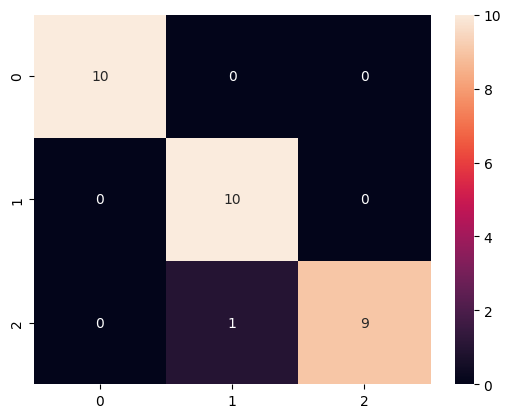

In [ ]:
# default params
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

metrix(y_test, y_pred)

In [ ]:
# crossvalidation
fold_sizes = np.arange(2,11)
results = {}
scr = []
for fold_size in fold_sizes:
  scores = cross_val_score(tree, X_train, y_train,
                           cv=fold_size, scoring='f1_macro')
  for score in scores:
    scr.append([score, fold_size])

  results[(fold_size)] = { 'f1_score': scores.mean()}

In [ ]:
print('Number of k-folds with scoring:')
pd.DataFrame(results)

Number of k-folds with scoring:


,2,3,4,5,6,7,8,9,10
f1_score,0.958276,0.941607,0.941646,0.941634,0.94033,0.948944,0.941246,0.940578,0.949471


In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'kfold'])
fig = px.box(scored_df, x = 'kfold', y="score", title='Kfolds scores')
fig.show()

In [ ]:
# Stratified cros
results = {}
scr = []
for fold_size in fold_sizes:
  stratified_kfold = StratifiedKFold(n_splits=fold_size, shuffle=True)
  scores = cross_val_score(tree, X_train, y_train, cv=stratified_kfold,
                           scoring='f1_macro')
  for score in scores:
    scr.append([score, fold_size])

  results[(fold_size)] = { 'f1_score': scores.mean()}

In [ ]:
print('Number of k-folds with scoring:')
pd.DataFrame(results)

Number of k-folds with scoring:


,2,3,4,5,6,7,8,9,10
f1_score,0.949843,0.932754,0.93325,0.949869,0.932363,0.921545,0.941246,0.95019,0.931693


In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'kfold'])
fig = px.box(scored_df, x = 'kfold', y="score", title='Kfolds scores for stratified kfold')
fig.show()

In [ ]:
grid_search = GridSearchCV(tree, param_grid, scoring='f1_macro', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.01, 0.05, 0.1, 0.2, 0.5],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 5, 10],
                         'min_samples_leaf': [1, 2, 4]},
             scoring='f1_macro')

Najlepsze wartości hiperparametrów: {'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1}
z uzyskanym wynikiem: 0.9499346405228758
Wyniki na zbiorze testowym:

Accuracy: 0.9666666666666667
f1 score: 0.9665831244778613


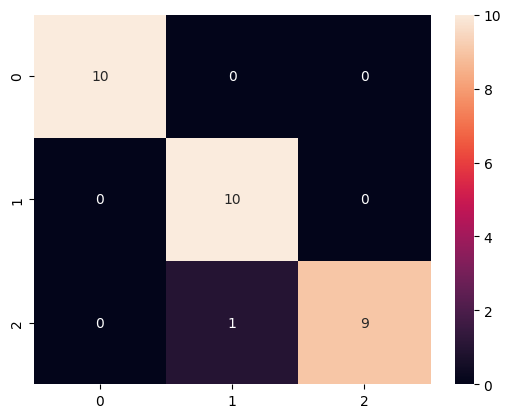

In [ ]:
print(f'Najlepsze wartości hiperparametrów: {grid_search.best_params_}\n\
z uzyskanym wynikiem: {grid_search.best_score_}')

y_preds = grid_search.predict(X_test)

print('Wyniki na zbiorze testowym:\n')
metrix(y_test, y_preds)

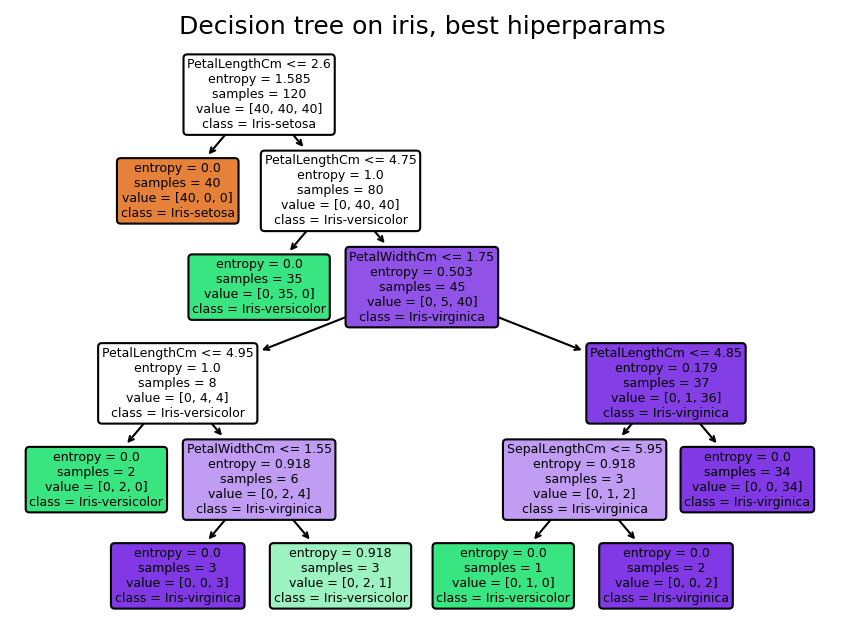

In [ ]:
best_params = grid_search.best_params_
best_tree = DecisionTreeClassifier(**best_params)  # unpack a dictionary into keyword arguments

plt.figure(dpi=150, figsize=(7, 5))
clf = best_tree.fit(X_train, y_train)
plot_tree(clf, filled=True, rounded=True, class_names = Species,
          feature_names=features)
plt.title("Decision tree on iris, best hiperparams")
plt.show()

In [ ]:
# for plot_trees
worst_params = {'ccp_alpha': 0.5, 'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 4}
med_params = {'ccp_alpha': 0, 'criterion': 'entropy', 'max_depth': 2, 'min_samples_leaf': 4}

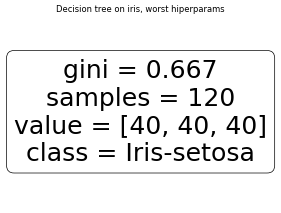

In [ ]:
worst_tree = DecisionTreeClassifier(**worst_params)  # unpack a dictionary into keyword arguments

plt.figure(dpi=50, figsize=(7, 5))
clf = worst_tree.fit(X_train, y_train)
plot_tree(clf, filled=True, rounded=True, class_names = Species, feature_names=features)
plt.title("Decision tree on iris, worst hiperparams")
plt.show()

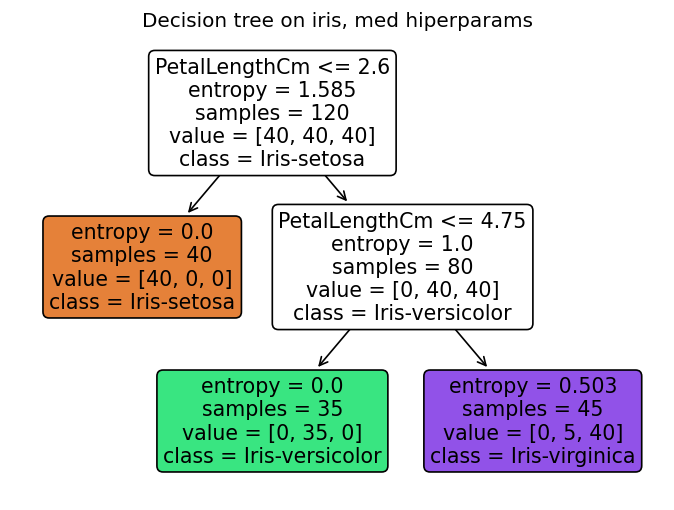

In [ ]:
med_tree = DecisionTreeClassifier(**med_params)  # unpack a dictionary into keyword arguments

plt.figure(dpi=120, figsize=(7, 5))
clf = med_tree.fit(X_train, y_train)
plot_tree(clf, filled=True, rounded=True, class_names = Species, feature_names=features)
plt.title("Decision tree on iris, med hiperparams")
plt.show()

In [ ]:
cv_df = pd.DataFrame(grid_search.cv_results_)
cv_df.sort_values(by=['mean_test_score'], ascending=False).head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.001854,0.000018,0.002255,0.000056,0.0,gini,5,1,"{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_d...",0.916667,0.95817,1.0,0.916667,0.958170,0.949935,0.031163,1
48,0.003495,0.000256,0.004892,0.000989,0.01,log_loss,5,1,"{'ccp_alpha': 0.01, 'criterion': 'log_loss', '...",0.916667,0.95817,1.0,0.916667,0.958170,0.949935,0.031163,1
42,0.003312,0.000399,0.003613,0.000147,0.01,entropy,10,1,"{'ccp_alpha': 0.01, 'criterion': 'entropy', 'm...",0.916667,0.95817,1.0,0.916667,0.958170,0.949935,0.031163,1
93,0.001980,0.000033,0.002326,0.000145,0.1,entropy,5,1,"{'ccp_alpha': 0.1, 'criterion': 'entropy', 'ma...",0.915344,0.95817,1.0,0.958170,0.916667,0.949670,0.031449,4
97,0.002463,0.000788,0.002294,0.000068,0.1,entropy,10,2,"{'ccp_alpha': 0.1, 'criterion': 'entropy', 'ma...",0.915344,0.95817,1.0,0.958170,0.916667,0.949670,0.031449,4


In [ ]:
# testing criterion
crit = param_grid['criterion']
results_n = []
scr = []
for c in crit:
  tree = DecisionTreeClassifier(criterion=c)
  scores = cross_val_score(tree, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'criterion'])
fig = px.box(scored_df, x = 'criterion', y="score", title='criterion scores')
fig.show()

In [ ]:
# testing max_depth
depth = param_grid['max_depth']
results = []
scr = []
for d in depth:
  tree = DecisionTreeClassifier(max_depth=d)
  scores = cross_val_score(tree, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results.append(scores.mean())
  for score in scores:
    scr.append([score, d])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'depths'])
fig = px.box(scored_df, x = 'depths', y="score", title='max_depths scores')
fig.show()

In [ ]:
# testing min_samples_leaf
min_leaf = param_grid['min_samples_leaf']
results = []
scr = []
for l in min_leaf:
  tree = DecisionTreeClassifier(min_samples_leaf=l)
  scores = cross_val_score(tree, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results.append(scores.mean())
  for score in scores:
    scr.append([score, l])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'min_samples_leaf'])
fig = px.box(scored_df, x = 'min_samples_leaf', y="score", title='min_samples_leaf scores')
fig.show()

In [ ]:
# testing ccp_alpha
ccp = param_grid['ccp_alpha']
results = []
scr = []
for c in ccp:
  tree = DecisionTreeClassifier(ccp_alpha=c)
  scores = cross_val_score(tree, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results.append(scores.mean())
  for score in scores:
    scr.append([score, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'ccp'])
fig = px.box(scored_df, x = 'ccp', y="score", title='ccp alpha scores')
fig.show()

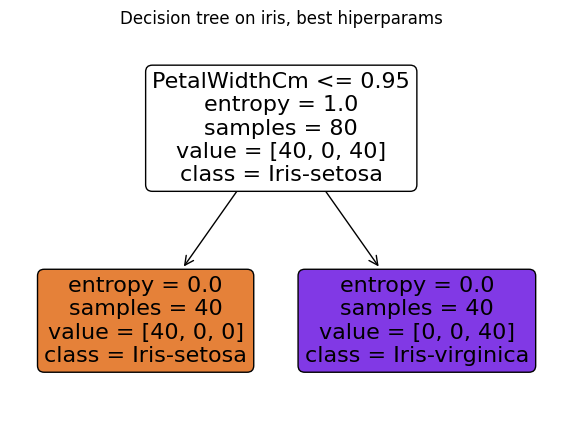

In [ ]:
# testing class_weight
class_weight = {'Iris-setosa':1,'Iris-versicolor':0,'Iris-virginica':1}

best_params['class_weight'] = class_weight

best_tree = DecisionTreeClassifier(**best_params)  # unpack a dictionary into keyword arguments

plt.figure(dpi=100, figsize=(7, 5))
clf = best_tree.fit(X_train, y_train)
y_pred = clf.predict(X_test)
plot_tree(clf, filled=True, rounded=True, class_names = Species,
          feature_names=features)
plt.title("Decision tree on iris, best hiperparams")
plt.show()

Accuracy: 0.6666666666666666
f1 score: 0.5555555555555555


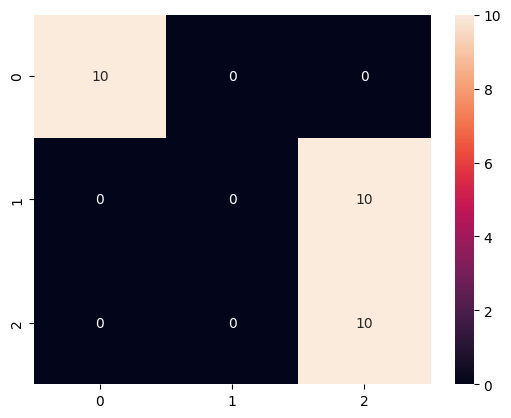

In [ ]:
metrix(y_test, y_pred)


# PCB

In [ ]:
#Ładowanie 5 zbiorów do DF
from scipy.io.arff import loadarff

y1_raw = loadarff(y1)
bank_y1 = pd.DataFrame(y1_raw[0])

y2_raw = loadarff(y2)
bank_y2 = pd.DataFrame(y2_raw[0])

y3_raw = loadarff(y3)
bank_y3 = pd.DataFrame(y3_raw[0])

y4_raw = loadarff(y4)
bank_y4 = pd.DataFrame(y4_raw[0])

y5_raw = loadarff(y5)
bank_y5 = pd.DataFrame(y5_raw[0])

In [ ]:
# Łączenie w 1 DF
frames = [bank_y1, bank_y2, bank_y3, bank_y4, bank_y5]
bank_all = pd.concat(frames, ignore_index=True)

In [ ]:
bank_all = bank_all.drop(columns=['Attr37'])

In [ ]:
encoder = OrdinalEncoder()

bank_all["class"] = encoder.fit_transform(bank_all[["class"]])

In [ ]:
bank_all.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0.0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0.0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0.0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0.0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0.0


In [ ]:
pd.value_counts(bank_all['class'])

0.0    41314
1.0     2091
Name: class, dtype: int64

In [ ]:
classes = [int(0.0), int(1.0)]
features = X.columns

In [ ]:
y = bank_all.pop('class')
X = bank_all

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,
                                                    random_state=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

pipe = Pipeline([('imputer', SimpleImputer(strategy='mean')),
                 ('tree', DecisionTreeClassifier())])

pipe_std = Pipeline([('imputer', SimpleImputer(strategy='mean')),
                     ('scaler', StandardScaler()),
                     ('tree', DecisionTreeClassifier())])

Accuracy: 0.9524248358484045
f1 score: 0.7425407616823132


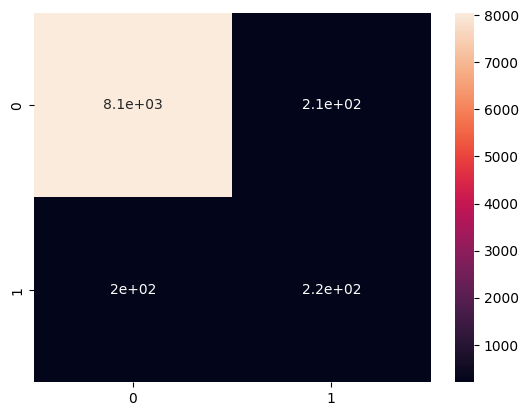

In [ ]:
# default params
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

metrix(y_test, y_pred)

Accuracy: 0.9510425066236609
f1 score: 0.7344621960260861


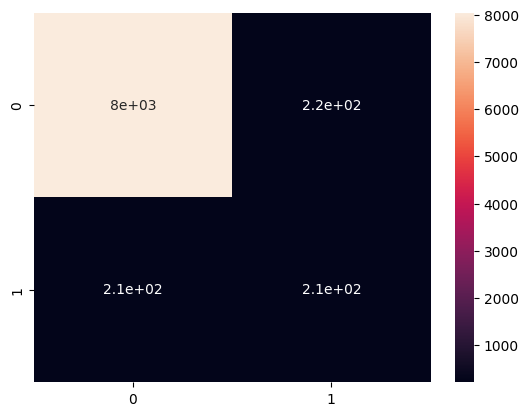

In [ ]:
# default params with scaling
pipe_std.fit(X_train, y_train)
y_pred = pipe_std.predict(X_test)

metrix(y_test, y_pred)

In [ ]:
# crossvalidation
fold_sizes = np.arange(2,11)
results = {}
scr = []
for fold_size in fold_sizes:
  scores = cross_val_score(pipe, X_train, y_train,
                           cv=fold_size, scoring='f1_macro')
  for score in scores:
    scr.append([score, fold_size])

  results[(fold_size)] = { 'f1_score': scores.mean()}

In [ ]:
print('Number of k-folds with scoring:')
pd.DataFrame(results)

Number of k-folds with scoring:


,2,3,4,5,6,7,8,9,10
f1_score,0.733446,0.733985,0.733306,0.737988,0.744836,0.740601,0.734608,0.737035,0.736631


In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'kfold'])
fig = px.box(scored_df, x = 'kfold', y="score", title='Kfolds scores')
fig.show()

In [ ]:
# Stratified cros
results = {}
scr = []
for fold_size in fold_sizes:
  stratified_kfold = StratifiedKFold(n_splits=fold_size, shuffle=True)
  scores = cross_val_score(pipe, X_train, y_train, cv=stratified_kfold,
                           scoring='f1_macro')
  for score in scores:
    scr.append([score, fold_size])

  results[(fold_size)] = { 'f1_score': scores.mean()}

In [ ]:
print('Number of k-folds with scoring:')
pd.DataFrame(results)

Number of k-folds with scoring:


,2,3,4,5,6,7,8,9,10
f1_score,0.712383,0.730032,0.739342,0.736157,0.738862,0.745637,0.751203,0.734941,0.739133


In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'kfold'])
fig = px.box(scored_df, x = 'kfold', y="score", title='Kfolds scores for stratified folds')
fig.show()

In [ ]:
param_grid = {
    "tree__criterion": ["gini", "entropy", "log_loss"],
    "tree__max_depth": [2, 5, 7, 10],
    "tree__min_samples_leaf": [1, 2, 4],
    "tree__ccp_alpha": [0.0, 0.01, 0.05, 0.1, 0.2, 0.5],
}

In [ ]:
# testing criterion
crit = param_grid['tree__criterion']
results_n = []
scr = []
for c in crit:
  pipe.set_params(tree__criterion=c)
  scores = cross_val_score(pipe, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results_n.append(scores.mean())
  for score in scores:
    scr.append([score, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'criterion'])
fig = px.box(scored_df, x = 'criterion', y="score", title='criterion scores')
fig.show()

In [ ]:
# testing max_depth
depth = param_grid['tree__max_depth']
results = []
scr = []
for d in depth:
  pipe.set_params(tree__max_depth=d)
  scores = cross_val_score(pipe, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results.append(scores.mean())
  for score in scores:
    scr.append([score, d])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'depths'])
fig = px.box(scored_df, x = 'depths', y="score", title='max_depths scores')
fig.show()

In [ ]:
# testing min_samples_leaf
min_leaf = param_grid['tree__min_samples_leaf']
results = []
scr = []
for l in min_leaf:
  pipe.set_params(tree__min_samples_leaf=l)
  scores = cross_val_score(pipe, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results.append(scores.mean())
  for score in scores:
    scr.append([score, l])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'min_samples_leaf'])
fig = px.box(scored_df, x = 'min_samples_leaf', y="score", title='min_samples_leaf scores')
fig.show()

In [ ]:
# testing ccp_alpha
ccp = param_grid['tree__ccp_alpha']
results = []
scr = []
for c in ccp:
  pipe.set_params(tree__ccp_alpha=c)
  scores = cross_val_score(pipe, X_train, y_train,
                           cv=5, scoring='f1_macro')
  results.append(scores.mean())
  for score in scores:
    scr.append([score, c])

In [ ]:
scored_df = pd.DataFrame(scr, columns=['score', 'ccp'])
fig = px.box(scored_df, x = 'ccp', y="score", title='ccp alpha scores')
fig.show()

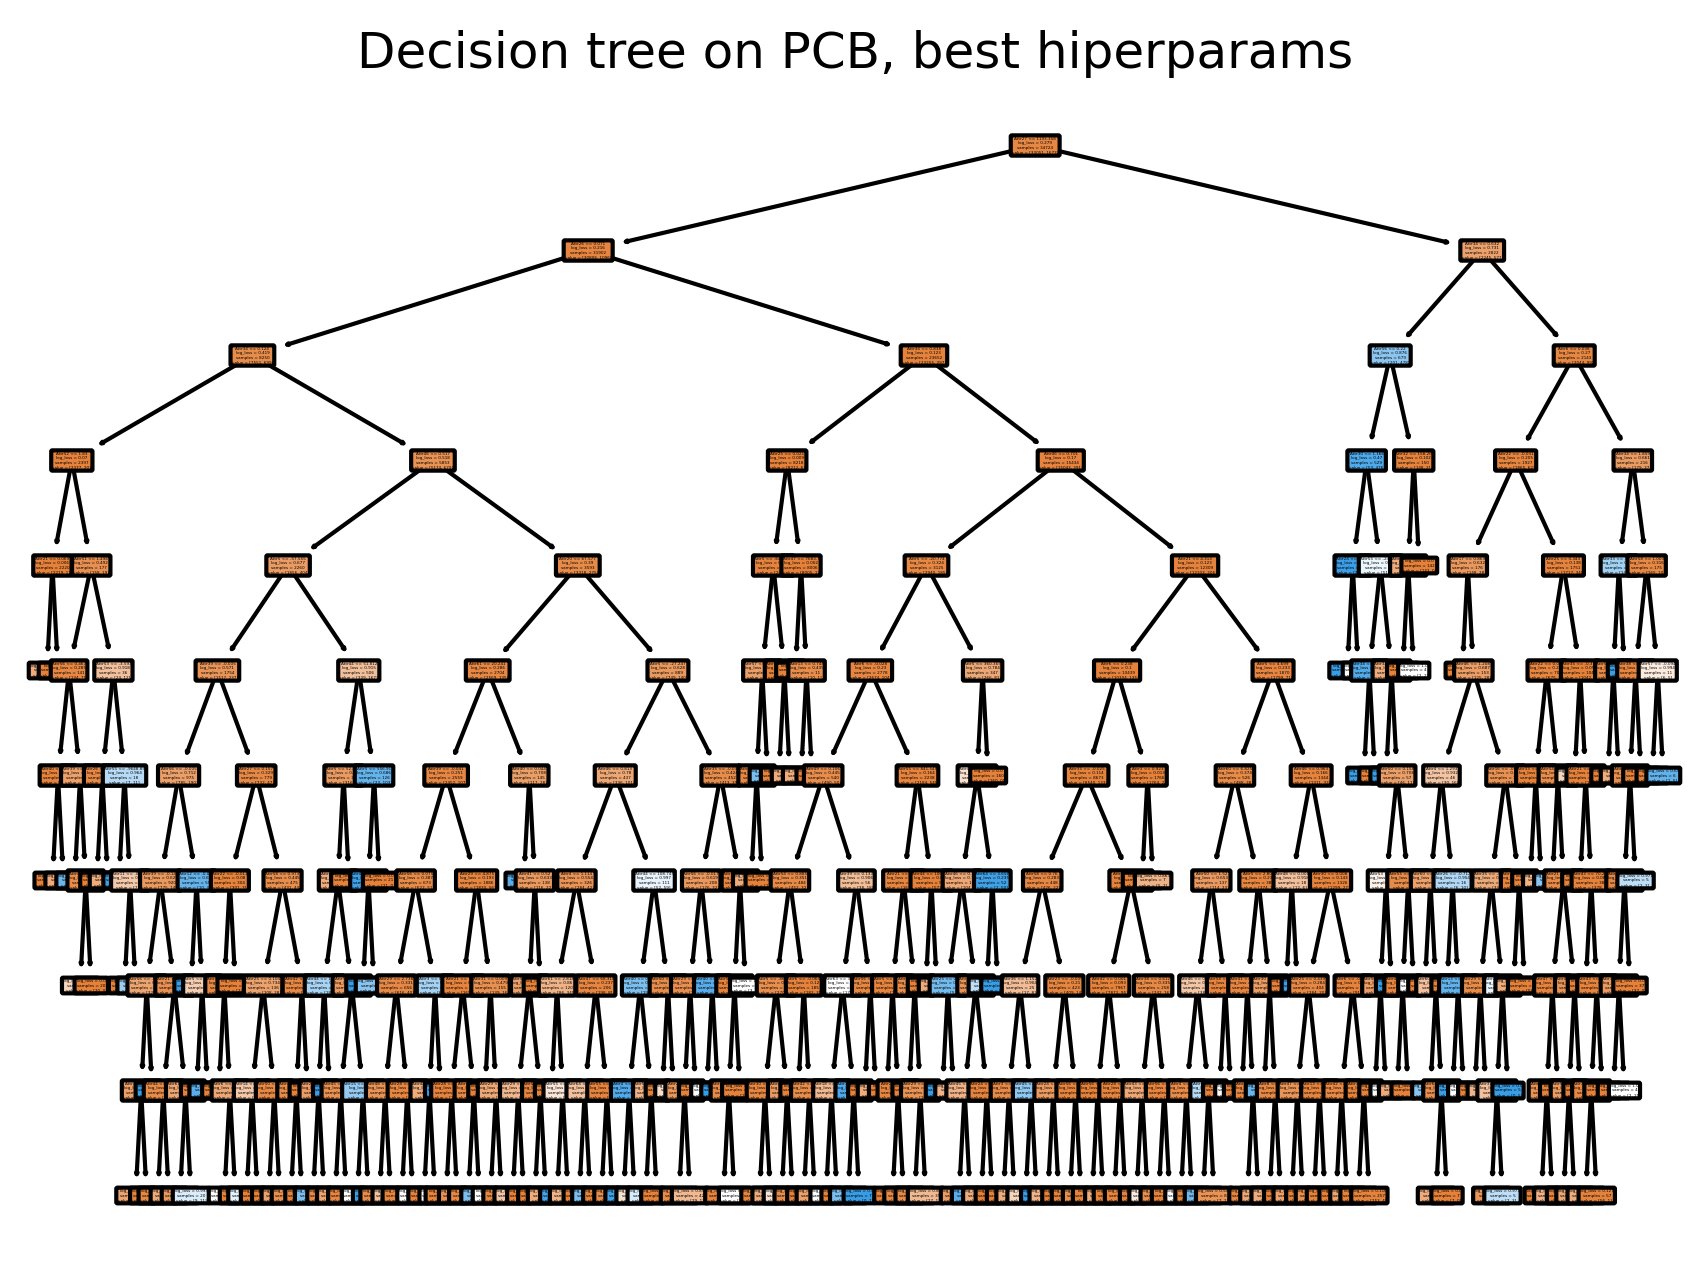

In [ ]:
pipe_best = pipe.set_params(tree__criterion="log_loss", tree__max_depth=10, tree__min_samples_leaf=4, tree__ccp_alpha=0.0)

pipe_best.fit(X_train, y_train)

plt.figure(dpi=300, figsize=(7, 5))

y_pred = pipe_best.predict(X_test)
plot_tree(pipe_best.steps[-1][1], filled=True, rounded=True,
          feature_names=features)
plt.title("Decision tree on PCB, best hiperparams")
plt.show()

Accuracy: 0.968667204239143
f1 score: 0.7888673097488832


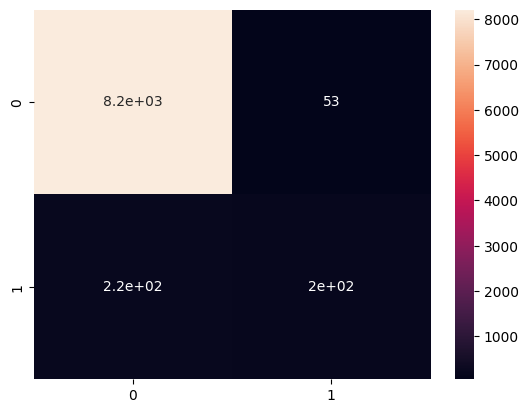

In [ ]:
metrix(y_test, y_pred)

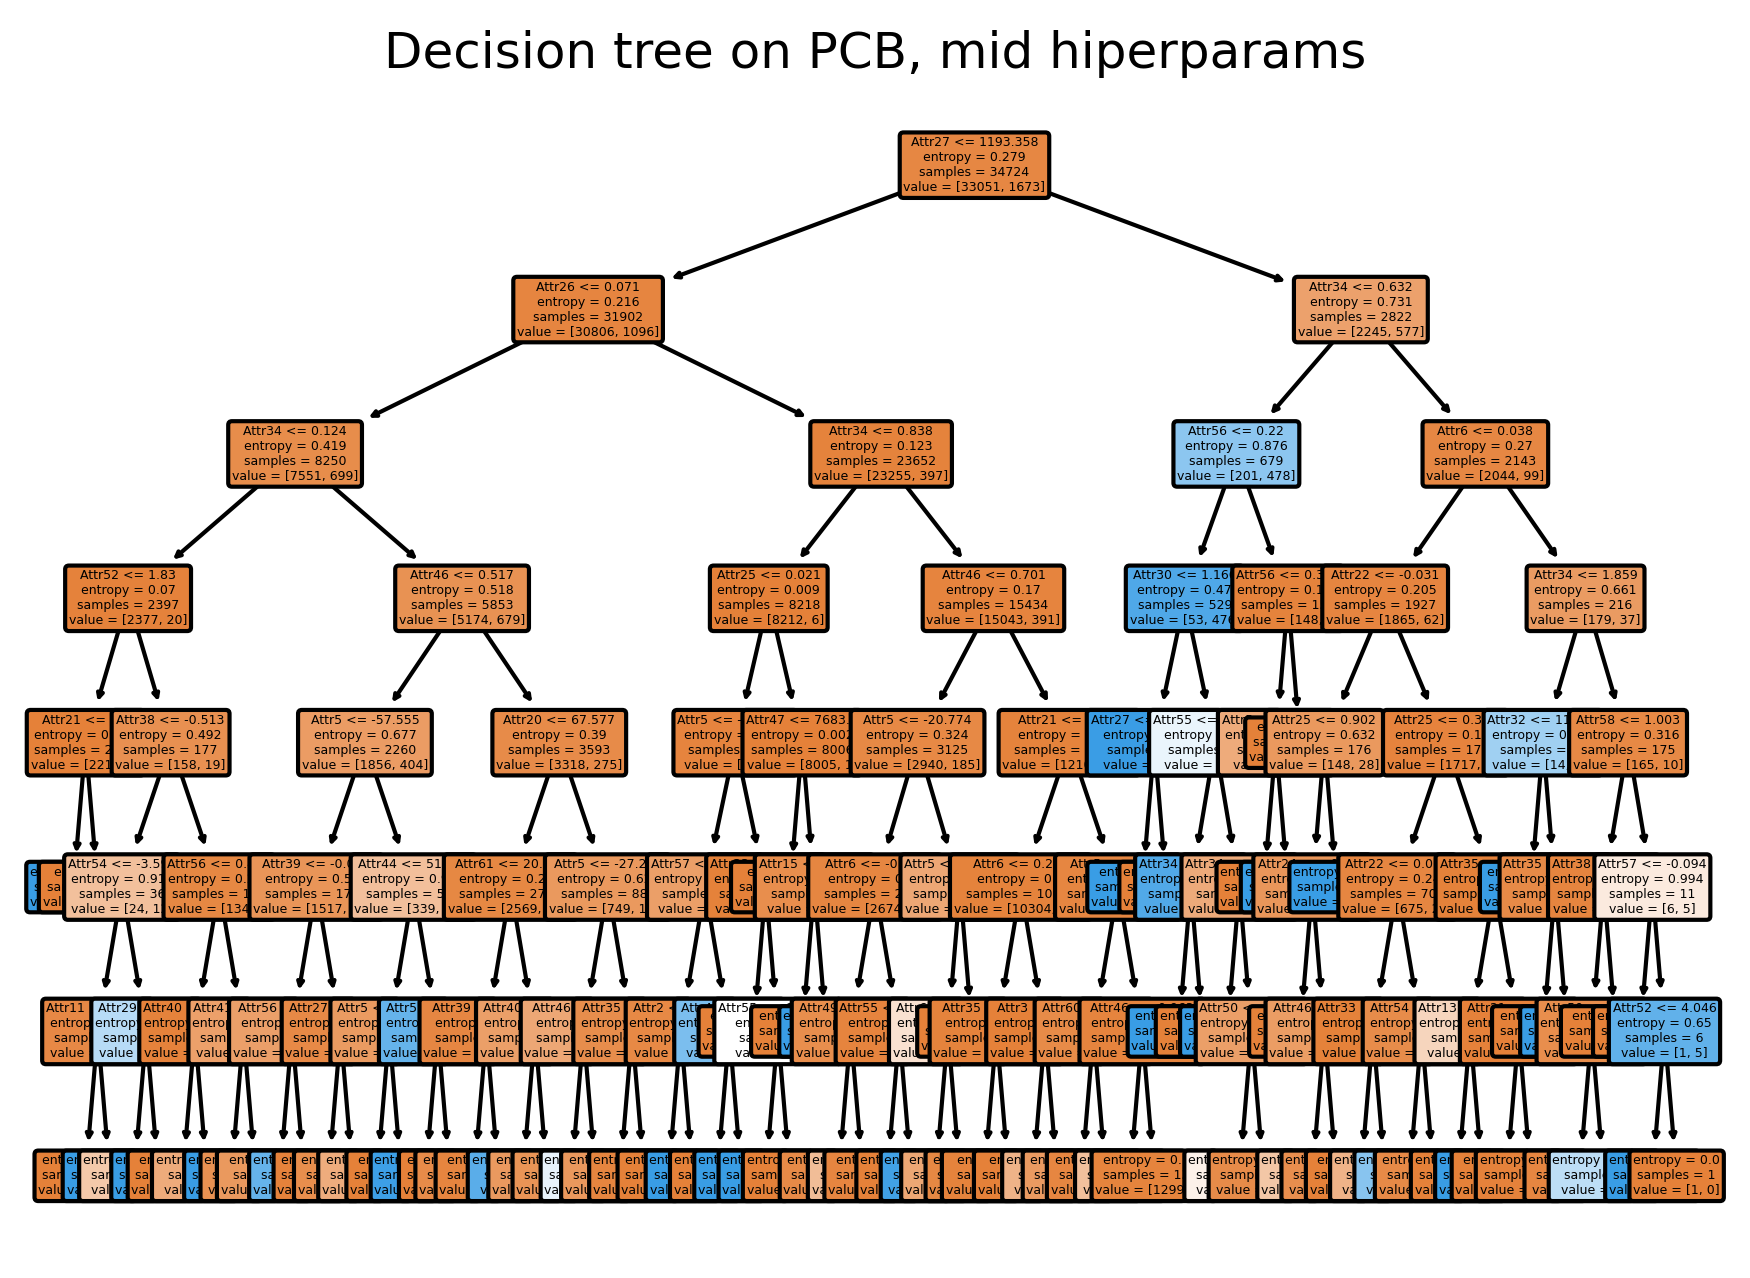

In [ ]:
pipe_mid = pipe.set_params(tree__criterion="entropy", tree__max_depth=7, tree__min_samples_leaf=1, tree__ccp_alpha=0.0)


pipe_mid.fit(X_train, y_train)

plt.figure(dpi=300, figsize=(7, 5))

y_pred = pipe_mid.predict(X_test)
plot_tree(pipe_mid.steps[-1][1], filled=True, rounded=True,
          feature_names=features, fontsize=3)
plt.title("Decision tree on PCB, mid hiperparams")
plt.show()

Accuracy: 0.9675152632185232
f1 score: 0.7663354311877287


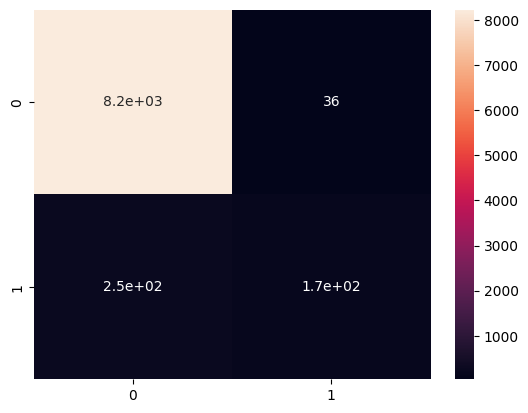

In [ ]:
metrix(y_test, y_pred)

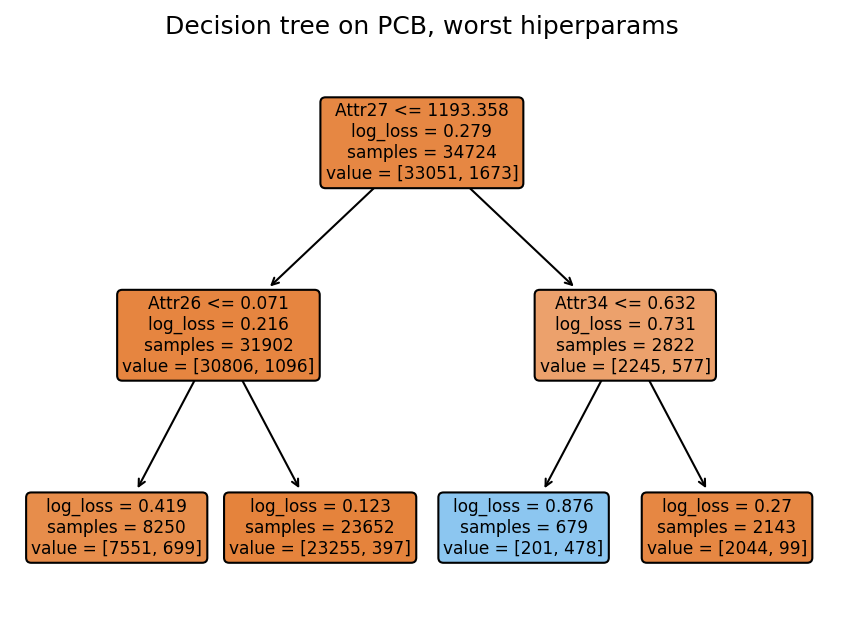

In [ ]:
pipe_worst = pipe.set_params(tree__criterion="log_loss", tree__max_depth=5, tree__min_samples_leaf=4, tree__ccp_alpha=0.01)

pipe_worst.fit(X_train, y_train)

plt.figure(dpi=150, figsize=(7, 5))

y_pred = pipe_worst.predict(X_test)
plot_tree(pipe_worst.steps[-1][1], filled=True, rounded=True,
          feature_names=features)
plt.title("Decision tree on PCB, worst hiperparams")
plt.show()

Accuracy: 0.9585301232576892
f1 score: 0.6912456164062


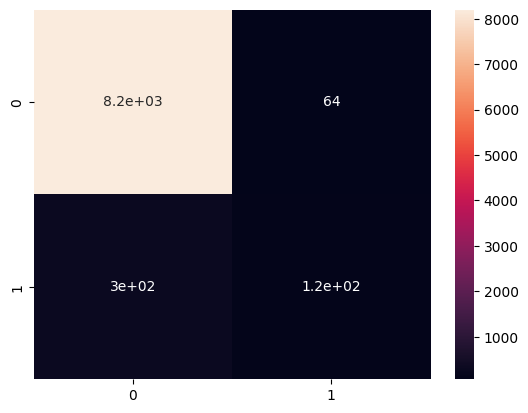

In [ ]:
metrix(y_test, y_pred)

Accuracy: 0.9192489344545559
f1 score: 0.7020186106005102


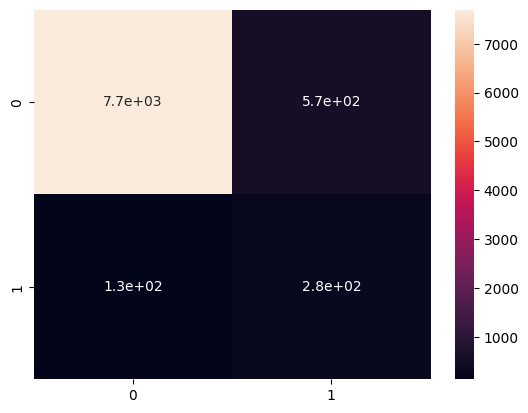

In [ ]:
# testing class_weight
class_weight = {int(0.0):1,int(1.0):10}

pipe_best = pipe.set_params(tree__criterion="log_loss", tree__max_depth=10,
                            tree__min_samples_leaf=4, tree__ccp_alpha=0.0,
                            tree__class_weight=class_weight)


pipe_best.fit(X_train, y_train)
y_pred = pipe_best.predict(X_test)
metrix(y_test, y_pred)

Accuracy: 0.8982836078792766
f1 score: 0.6679789859695521


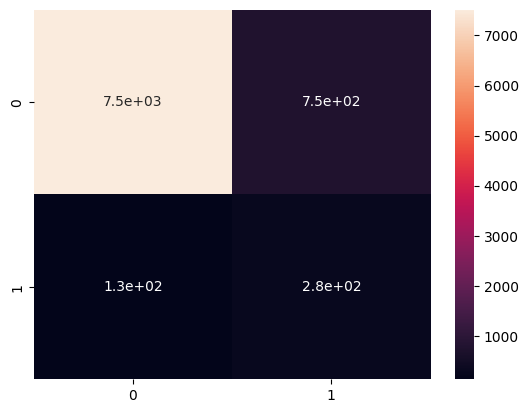

In [ ]:
pipe_best = pipe.set_params(tree__criterion="log_loss", tree__max_depth=10,
                            tree__min_samples_leaf=4, tree__ccp_alpha=0.0,
                            tree__class_weight='balanced')


pipe_best.fit(X_train, y_train)
y_pred = pipe_best.predict(X_test)
metrix(y_test, y_pred)